In [1]:
import pandas as pd
import pyarrow.parquet as pq

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_parquet("./full.parquet")
df.shape

(1017176, 21)

In [3]:
df.head()

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,body_bytes_sent,http_referer,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime
0,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET / HTTP/1.1""",GET,/,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/,/,[],,2023-06-27,1.687824e+09,07:12:12,7.2
1,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET /index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/index/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /index/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:12,7.2
2,185.213.174.190,-,[27/Jun/2023:07:12:13 -0600],27/Jun/2023,07:12:13,"""GET /index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/admin/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /admin/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:13,7.2
3,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/api/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /api/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:14,7.2
4,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/home/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728

In [4]:
list(df)

['remote_addr',
 'remote_usr',
 'date_time',
 'date',
 'time',
 'request',
 'req_method',
 'req_uri',
 'http_ver',
 'status',
 'body_bytes_sent',
 'http_referer',
 'user_agent',
 'dec_req_uri',
 'clean_path',
 'clean_query_list',
 'domain',
 'fdate',
 'dateunixtimest',
 'ftime',
 'fabstime']

In [5]:
df.dtypes

remote_addr                 object
remote_usr                  object
date_time                   object
date                        object
time                        object
request                     object
req_method                  object
req_uri                     object
http_ver                    object
status                     float64
body_bytes_sent            float64
http_referer                object
user_agent                  object
dec_req_uri                 object
clean_path                  object
clean_query_list            object
domain                      object
fdate               datetime64[ns]
dateunixtimest             float64
ftime                       object
fabstime                   float64
dtype: object

In [6]:
cols_interest = ["remote_usr", "http_ver"]
# Imprimimos los distintos valores que tiene cada columna
print(pd.Series({col: df[col].unique() for col in cols_interest }))

remote_usr    [-, Jose, admin, Brenda, Cecilia, Maria, Yves, Roberto, Ricardo]
http_ver                                                  [HTTP/1.1, HTTP/1.0]
dtype: object


In [7]:
#print(df.groupby('http_referer')['http_referer'].count())

In [8]:
df["http_referer"].head(3000).unique()

array(['-', 'http://nextcloud-sader.designa.mx/wp-login.php',
       'https://www.latinaer.org/about',
       'https://www.latinaer.org/static/css/main.5f06e3a5.chunk.css',
       'https://moodle.ucags.edu.mx/theme/styles.php/moove/1672684159_1610089734/all',
       'https://moodle.ucags.edu.mx/mod/assign/view.php?id=111342&forceview=1',
       'https://moodle.ucags.edu.mx/login/index.php',
       'https://accounts.google.com/',
       'https://moodle.ucags.edu.mx/course/view.php?id=2027',
       'https://moodle.ucags.edu.mx/course/view.php?id=2027&notifyeditingon=1',
       'https://moodle.ucags.edu.mx/course/editsection.php?id=22323&sr',
       'https://moodle.ucags.edu.mx/course/modedit.php?update=108201&return=0&sr=0',
       'https://moodle.ucags.edu.mx/mod/forum/view.php?id=108201&forceview=1',
       'https://moodle.ucags.edu.mx/course/modedit.php?add=assign&type=&course=2027&section=6&return=0&sr=0',
       'https://www.google.com/', 'http://localhost/',
       'https://servici

### One-Hot encoding req_method

In [9]:
df["dec_req_uri"].head(300).unique()

array(['/',
       "/index.php?s=/index/think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');",
       "/index.php?s=/admin/think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');",
       "/index.php?s=/api/think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');",
       "/index.php?s=/home/think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');",
       "/index.php?s=/user/think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');",
       "/index.php?s=//think\\app/invokeMethod&method[0]=think\\view\\driver\\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f'

In [10]:
df["domain"].unique()

array(['', 'nextcloud-sader.designa.mx', 'www.latinaer.org',
       'moodle.ucags.edu.mx', 'accounts.google.com', 'www.google.com',
       'localhost', 'servicios.ieec.mx', 'www.ieec.mx',
       '158.69.255.11:80', 'ojs.latinaer.org', 'com.google.android.gm',
       'aprendizajes.ieec.mx', 'latinaer.org', 'sii.upa.edu.mx',
       'cdn.designa.mx', 'sites.google.com', 'reportesusmef.net',
       'cms.designa.mx', 'accounts.google.com.mx', 'intranet.upa.edu.mx',
       'pbr.upa.edu.mx', 'www.mindmeister.com', 'sis.cij.gob.mx',
       'ieec.mx', 'www.cide-edna.org', 'mx.search.yahoo.com',
       'comunidadaprende.edu.mx', 'web.whatsapp.com',
       'www.comunidadaprende.edu.mx', 'www.aguasvoyalcentro.com',
       'puntoderecarga.mx', 'dbmanager.designa.mx', 'www.google.com.mx',
       'baidu.com', 'scholar.google.com.pe', 'upa.edu.mx',
       'outlook.office.com', 'sader.designa.mx',
       'stage.puntoderecarga.mx', 'experiencia21.tec.mx',
       'www.petalsearch.com', 'search-dra.dt.dba

In [11]:
df.query("domain == ''").head(100)

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,body_bytes_sent,http_referer,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime
0,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET / HTTP/1.1""",GET,/,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/,/,[],,2023-06-27,1.687824e+09,07:12:12,7.200000
1,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET /index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/index/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /index/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:12,7.200000
2,185.213.174.190,-,[27/Jun/2023:07:12:13 -0600],27/Jun/2023,07:12:13,"""GET /index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/admin/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /admin/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:13,7.200000
3,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/api/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /api/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:14,7.200000
4,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/home/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be

In [12]:
df.dtypes

remote_addr                 object
remote_usr                  object
date_time                   object
date                        object
time                        object
request                     object
req_method                  object
req_uri                     object
http_ver                    object
status                     float64
body_bytes_sent            float64
http_referer                object
user_agent                  object
dec_req_uri                 object
clean_path                  object
clean_query_list            object
domain                      object
fdate               datetime64[ns]
dateunixtimest             float64
ftime                       object
fabstime                   float64
dtype: object

In [13]:
df.shape

(1017176, 21)

In [14]:
df["date_time"].nunique()


396254

In [15]:
from datetime import datetime
df.loc[:, 'fdatetime'] = df['date_time'].apply(lambda x: datetime.strptime(x, '[%d/%b/%Y:%H:%M:%S -0600]'))

In [16]:
df[["fdatetime", "date_time"]].head()

,fdatetime,date_time
0,2023-06-27 07:12:12,[27/Jun/2023:07:12:12 -0600]
1,2023-06-27 07:12:12,[27/Jun/2023:07:12:12 -0600]
2,2023-06-27 07:12:13,[27/Jun/2023:07:12:13 -0600]
3,2023-06-27 07:12:14,[27/Jun/2023:07:12:14 -0600]
4,2023-06-27 07:12:14,[27/Jun/2023:07:12:14 -0600]


In [17]:
df["fdatetime"].nunique()

396254

In [18]:
#df_test = df.groupby(['date_time']).size()

In [19]:
#df_test

In [20]:
df.query("date_time == '[13/Jun/2023:05:06:49 -0600]'")[["date_time", "fdatetime", "body_bytes_sent"]]

,date_time,fdatetime,body_bytes_sent
151576,[13/Jun/2023:05:06:49 -0600],2023-06-13 05:06:49,450.0
151577,[13/Jun/2023:05:06:49 -0600],2023-06-13 05:06:49,450.0


In [21]:
df_test = df.groupby(['fdatetime'], as_index=False).sum(["body_bytes_sent"])

In [22]:
df_test.head(250)

,fdatetime,status,body_bytes_sent,dateunixtimest,fabstime
0,2023-03-24 06:07:34,200.0,14210.0,1.679616e+09,6.116667
1,2023-03-24 06:07:35,600.0,43173.0,5.038848e+09,18.350000
2,2023-03-24 06:07:36,400.0,29696.0,3.359232e+09,12.233333
3,2023-03-24 06:07:37,800.0,59871.0,6.718464e+09,24.466667
4,2023-03-24 06:07:38,400.0,28978.0,3.359232e+09,12.233333
5,2023-03-24 06:07:39,800.0,59789.0,6.718464e+09,24.466667
6,2023-03-24 06:07:40,600.0,43190.0,5.038848e+09,18.350000
7,2023-03-24 06:07:41,600.0,44312.0,5.038848e+09,18.350000
8,2023-03-24 06:07:42,600.0,43879.0,5.038848e+09,18.350000
9,2023-03-24 06:07:43,1200.0,72349.0,1.007770e+10,36.700000


In [23]:
df["date"].unique()

array(['27/Jun/2023', '20/Jun/2023', '21/Jun/2023', '13/Jun/2023',
       '14/Jun/2023', '18/Jun/2023', '19/Jun/2023', '15/Jun/2023',
       '16/Jun/2023', '25/Jun/2023', '17/Jun/2023', '24/Jun/2023',
       '26/Jun/2023', '22/Jun/2023', '23/Jun/2023', '24/Mar/2023'],
      dtype=object)

In [24]:
#df.query("date == '24/Mar/2023'")["date_time"]

In [25]:
df_test.query("fdatetime == '2023-06-13 05:06:49'")

,fdatetime,status,body_bytes_sent,dateunixtimest,fabstime
150,2023-06-13 05:06:49,400.0,900.0,3.373229e+09,10.2


In [26]:
df_test.dtypes

fdatetime          datetime64[ns]
status                    float64
body_bytes_sent           float64
dateunixtimest            float64
fabstime                  float64
dtype: object

Text(0, 0.5, 'Hora (normalizada)')

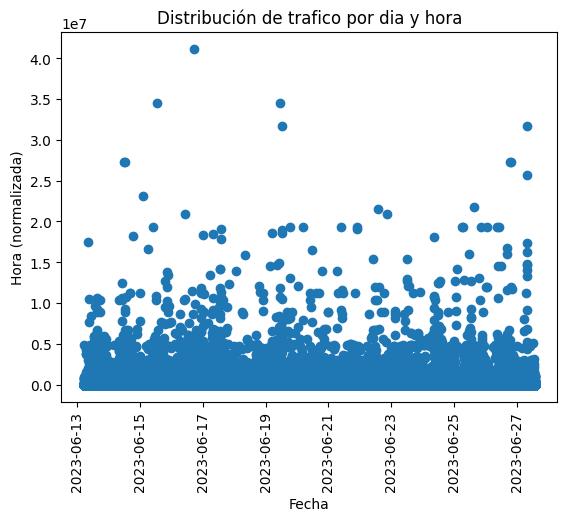

In [27]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_test.query("fdatetime > '2023-06-01 00:00:00'")["fdatetime"], 
            df_test.query("fdatetime > '2023-06-01 00:00:00'")["body_bytes_sent"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

Text(0, 0.5, 'Hora (normalizada)')

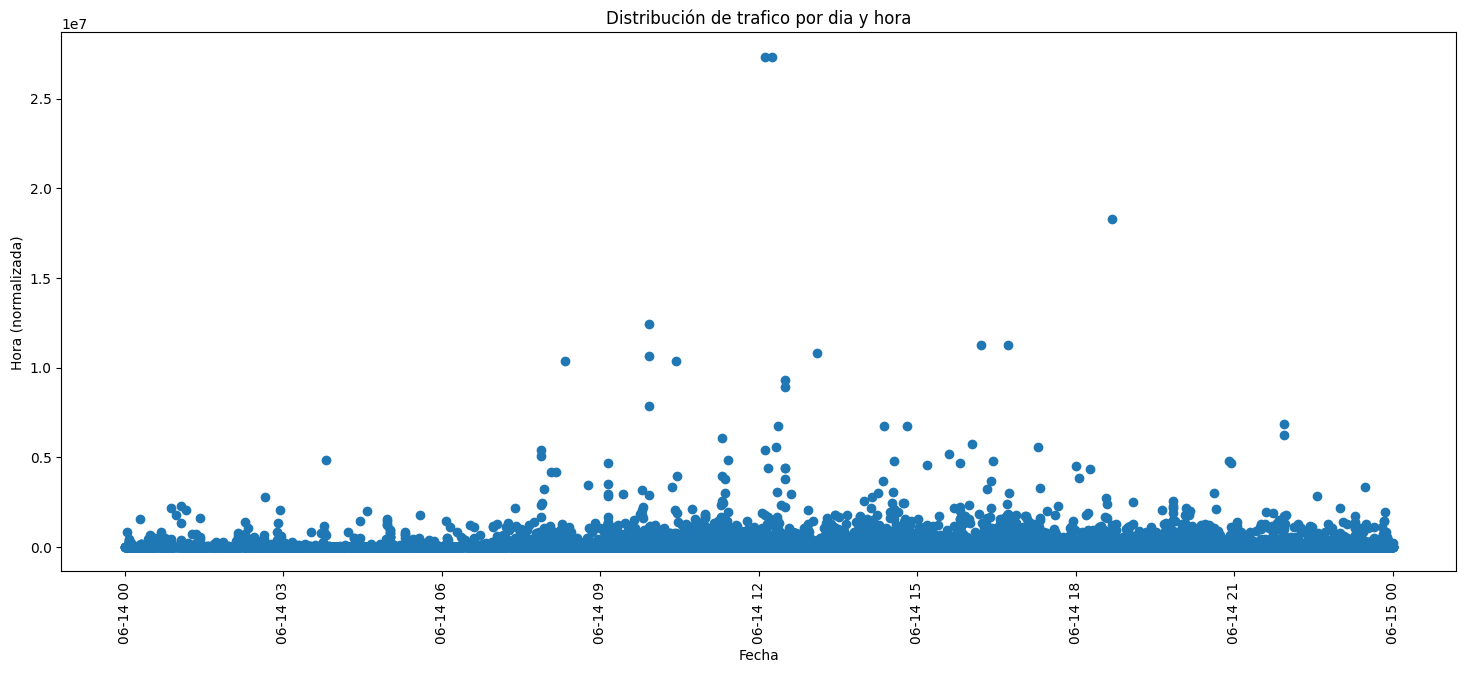

In [34]:

plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 12]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_test.query("fdatetime > '2023-06-14 00:00:00' and fdatetime < '2023-06-15 00:00:00'")["fdatetime"], 
            df_test.query("fdatetime > '2023-06-14 00:00:00' and fdatetime < '2023-06-15 00:00:00'")["body_bytes_sent"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

In [29]:
max(df_test["body_bytes_sent"])

41148667.0

In [30]:
min(df_test["body_bytes_sent"])

0.0

In [33]:
import numpy as np
np.quantile(df_test["body_bytes_sent"], [0.25, 0.5, 0.75])

array([  591.,  9060., 34246.])

Una disculpa pero no logré encontrar la función que se ajustará a mis datos, igual voy a continuar trabajando en esto en la semana y probablemente le contacte para resolver algunas dudas que tengo. 
Igual decidí enviarle este avance que fue más de exploración de datos porque al menos espero note el esfuerzo.